In [1]:
import pandas as pd

#ignore minor warnings
import warnings
warnings.filterwarnings("ignore")

import acquire
import prepare
import model

In [2]:
df_in = acquire.get_data(query_url = False)
print(df_in.shape)
df_in = prepare.prepare_dataframe(df_in)
train, validate, test = prepare.split_data(df_in)
train.shape, validate.shape, test.shape

Found file in working directory!
(70932, 83)


((40311, 60), (6719, 60), (6719, 60))

In [3]:
# def extract_legality_columns(df, legality_to_abstract):
#     df[f"{legality_to_abstract}_legality"] = df['legalities'].apply(lambda r : r[legality_to_abstract])
#     return df

# def get_legality_types(df):
#     game_legalities = df.legalities.iloc[0].keys()
#     df_new = pd.DataFrame()
#     for game_legality in game_legalities:
#         df_new = extract_legality_columns(df, game_legality)
#     return df_new, game_legalities

model_train = model.prepare_model_df(train)
model_validate = model.prepare_model_df(validate)
X, y, _, _ = model.scale_and_make_X_and_y(model_train, model_validate)

In [4]:
X.select_dtypes(include=int).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40311 entries, 39296 to 2198
Empty DataFrame

<AxesSubplot:>

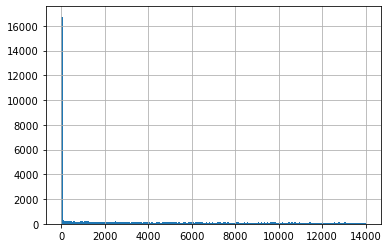

In [9]:
train.penny_rank.hist(bins = 200)

In [6]:
#X.penny_rank.value_counts(dropna = False)

AttributeError: 'DataFrame' object has no attribute 'penny_rank'

In [ ]:
train[train.id == 'd2e9decf-47b7-44e0-b380-8055b6011021']